<div align="center">
<img src="https://www.fondation-mines-telecom.org/wp-content/uploads/2016/01/IMT_Atlantique_logo_RVB_Baseline-1.jpg" width=40%>
</div>

# <div align="center"> Machine Learning - Mini Project </div>

### Authors:
- Jules DECAESTECKER
- Ella FERNANDEZ
- Frédéric LIN
- Jonathan LYS

--- 

# Setup

We load the data and show the first few rows and info of the data.


In [1]:
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import os

load_dotenv()

if os.getenv("DATA_FOLDER") == "":
    os.environ["DATA_FOLDER"] = "data"

In [2]:
# Open bank.csv
bank = pd.read_csv(os.path.join(os.getenv("DATA_FOLDER"), "bank.csv"))
bank.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [4]:
# Open kidney.csv
kidney = pd.read_csv(os.path.join(os.getenv("DATA_FOLDER"), "kidney.csv"))
kidney.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
kidney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      400 non-null    int64  
 1   age     391 non-null    float64
 2   bp      388 non-null    float64
 3   sg      353 non-null    float64
 4   al      354 non-null    float64
 5   su      351 non-null    float64
 6   rbc     248 non-null    object 
 7   pc      335 non-null    object 
 8   pcc     396 non-null    object 
 9   ba      396 non-null    object 
 10  bgr     356 non-null    float64
 11  bu      381 non-null    float64
 12  sc      383 non-null    float64
 13  sod     313 non-null    float64
 14  pot     312 non-null    float64
 15  hemo    348 non-null    float64
 16  pcv     330 non-null    object 
 17  wc      295 non-null    object 
 18  rc      270 non-null    object 
 19  htn     398 non-null    object 
 20  dm      398 non-null    object 
 21  cad     398 non-null    object 
 22  ap

The bank dataset is already preprocessed and contains only numerical features. That is not the case for the kidney dataset, which have missing values, categorical and numerical values. We will preprocess the kidney dataset in the next section.

# Preprocessing - Data Cleaning
We now clean the data for the kidney dataset.

In [6]:
# Visualize missing values / bad encoding
for col in kidney.columns:
    if kidney[col].dtype == object:
        print(col, kidney[col].unique(), kidney[col].dtype) 

rbc [nan 'normal' 'abnormal'] object
pc ['normal' 'abnormal' nan] object
pcc ['notpresent' 'present' nan] object
ba ['notpresent' 'present' nan] object
pcv ['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '?' '52' '14' '22' '18' '42' '17' '46' '23' '19'
 '25' '41' '26' '15' '21' '43' '20' '47' '9' '49' '50' '53' '51' '54'] object
wc ['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '7100' '11800' '9400' '5500' '5800' '13200'
 '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800' '6500'
 '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300' '12400'
 '10500' '4200' '4700' '10900' '8100' '9500' '2200' '12800' '11200'
 '19100' '?' '12300' '16700' '2600' '26400' '8800' '7400' '4900' '8000'
 '12000' '15700' '4100' '5700' '11500' '54

We first solve the formatting problems and "?" values in the kidney dataset. We replace "?" with NaN values and convert the numerical values to float. All the categorical values are booleanized.

In [7]:
# Formatting 

# Replace ? with np.nan

kidney = kidney.replace("?", np.nan)

for col in kidney.columns:
    if kidney[col].dtype == object:
        print(col, kidney[col].unique()) 

rbc [nan 'normal' 'abnormal']
pc ['normal' 'abnormal' nan]
pcc ['notpresent' 'present' nan]
ba ['notpresent' 'present' nan]
pcv ['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '52' '14' '22' '18' '42' '17' '46' '23' '19'
 '25' '41' '26' '15' '21' '43' '20' '47' '9' '49' '50' '53' '51' '54']
wc ['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '7100' '11800' '9400' '5500' '5800' '13200'
 '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800' '6500'
 '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300' '12400'
 '10500' '4200' '4700' '10900' '8100' '9500' '2200' '12800' '11200'
 '19100' '12300' '16700' '2600' '26400' '8800' '7400' '4900' '8000'
 '12000' '15700' '4100' '5700' '11500' '5400' '10800' '9900' '5200' '5900'
 '9300' '9

In [8]:
from preprocessing import int_encoding

to_encode = []

for column in kidney.columns:
    try:
        kidney[column].astype(float)
    except:
        to_encode.append(column)

print(to_encode)

encoded_kidney = int_encoding(kidney, to_encode).astype(float)

encoded_kidney.info()

['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'class']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      400 non-null    float64
 1   age     391 non-null    float64
 2   bp      388 non-null    float64
 3   sg      353 non-null    float64
 4   al      354 non-null    float64
 5   su      351 non-null    float64
 6   rbc     353 non-null    float64
 7   pc      335 non-null    float64
 8   pcc     396 non-null    float64
 9   ba      396 non-null    float64
 10  bgr     356 non-null    float64
 11  bu      381 non-null    float64
 12  sc      383 non-null    float64
 13  sod     313 non-null    float64
 14  pot     312 non-null    float64
 15  hemo    348 non-null    float64
 16  pcv     329 non-null    float64
 17  wc      294 non-null    float64
 18  rc      269 non-null    float64
 19  htn     398 non-null    float64
 20

We then replace nan values with the median of the column.

In [9]:
to_fill = [column for column in encoded_kidney.columns if encoded_kidney[column].isna().sum() > 0]
print(to_fill)

['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']


In [10]:
from preprocessing import fill_na
filled_kidney = fill_na(encoded_kidney, to_fill, strategy="median")

filled_kidney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      400 non-null    float64
 1   age     400 non-null    float64
 2   bp      400 non-null    float64
 3   sg      400 non-null    float64
 4   al      400 non-null    float64
 5   su      400 non-null    float64
 6   rbc     400 non-null    float64
 7   pc      400 non-null    float64
 8   pcc     400 non-null    float64
 9   ba      400 non-null    float64
 10  bgr     400 non-null    float64
 11  bu      400 non-null    float64
 12  sc      400 non-null    float64
 13  sod     400 non-null    float64
 14  pot     400 non-null    float64
 15  hemo    400 non-null    float64
 16  pcv     400 non-null    float64
 17  wc      400 non-null    float64
 18  rc      400 non-null    float64
 19  htn     400 non-null    float64
 20  dm      400 non-null    float64
 21  cad     400 non-null    float64
 22  ap

# Vizualization

Now that the data is clean, we visualize it before splitting and training the model.

In [11]:
viz = True

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.manifold import TSNE

sns.set_style("whitegrid")


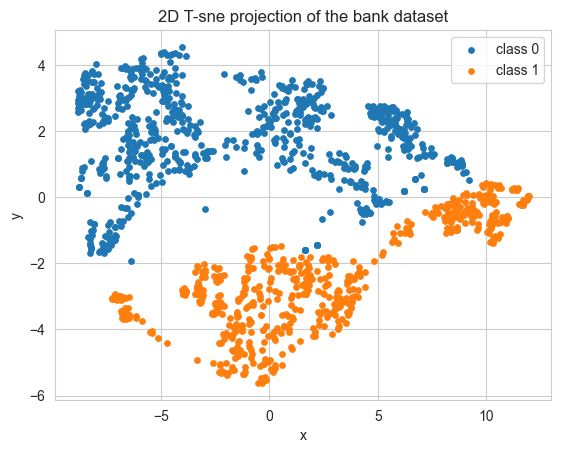

In [13]:
if viz:
    tsne1 = TSNE(n_components=2, perplexity=300)
    transformed_bank = tsne1.fit_transform(bank.drop(columns=["class"]))
    for class_index in bank["class"].value_counts().index:
        indexes = np.where(bank["class"]==class_index)
        plt.scatter(transformed_bank[:,0][indexes], transformed_bank[:,1][indexes],label=f"class {class_index}", s=15)
    plt.legend();plt.xlabel("x");plt.ylabel("y");plt.title("2D T-sne projection of the bank dataset")
    plt.show()

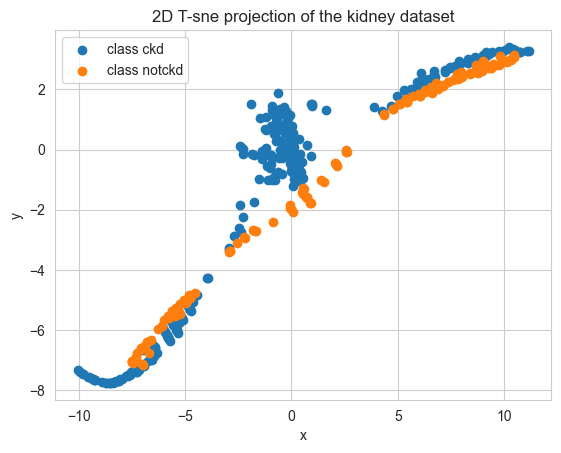

In [14]:
if viz:
    tsne2 = TSNE(n_components=2,
                 early_exaggeration= 20,
                 perplexity=100,
                 )

    transformed_kidney = tsne2.fit_transform(filled_kidney.drop(columns=["class"]))
    for class_index in kidney["class"].value_counts().index:
        indexes = np.where(kidney["class"]==class_index)
        plt.scatter(transformed_kidney[:,0][indexes], transformed_kidney[:,1][indexes],label=f"class {class_index}")
    plt.legend();plt.xlabel("x");plt.ylabel("y");plt.title("2D T-sne projection of the kidney dataset")
    plt.show()

Comparing the two datasets, we can see that the bank dataset 2D tsne transformation is linearly separable, while the kidney dataset is not. We excpect the kidney dataset to be harder to classify.

# Preprocessing - Splitting and scaling

## Splitting

In [15]:
from preprocessing import train_test_split

# The split will be 70% train, 30% test

kidney_train, kidney_test = train_test_split(filled_kidney, train_split=0.7)
bank_train, bank_test = train_test_split(bank, train_split=0.7)

# NB: the validation set will be created in the GridSearchCV function


print(kidney_train.shape, kidney_test.shape)
print(bank_train.shape, bank_test.shape)
    

(280, 26) (120, 26)
(960, 5) (412, 5)


### Scaling

In [16]:
from sklearn.preprocessing import StandardScaler #, MinMaxScaler, RobustScaler
from preprocessing import normalize # will keep the columns and the class column

scaler_kidney = StandardScaler()
scaler_bank = StandardScaler()

scaled_train_kidney, scaler_kidney = normalize(kidney_train, scaler_kidney, fitted=True)
scaled_test_kidney, _ = normalize(kidney_test, scaler_kidney, fitted=False) # prevent data leakage

scaled_train_bank, scaler_bank = normalize(bank_train, scaler_bank, fitted=True)
scaled_test_bank, _ = normalize(bank_test, scaler_bank, fitted=False)


In [17]:
scaled_train_kidney.describe()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
count,2.800000e+02,2.800000e+02,2.800000e+02,2.800000e+02,2.800000e+02,2.800000e+02,2.800000e+02,2.800000e+02,2.800000e+02,2.800000e+02,...,2.800000e+02,2.800000e+02,2.800000e+02,2.800000e+02,280.000000,2.800000e+02,280.000000,280.000000,2.800000e+02,280.000000
mean,1.268826e-17,1.522592e-16,-5.107026e-16,-1.941621e-14,6.344132e-17,-6.978545e-17,-6.344132e-18,3.806479e-17,-3.806479e-17,-6.344132e-17,...,1.934960e-16,-2.664535e-16,2.283887e-16,-8.881784e-17,0.000000,-7.771561e-17,0.000000,0.000000,-7.612958e-17,0.371429
std,1.001791e+00,1.001791e+00,1.001791e+00,1.001791e+00,1.001791e+00,1.001791e+00,1.001791e+00,1.001791e+00,1.001791e+00,1.001791e+00,...,1.001791e+00,1.001791e+00,1.001791e+00,1.001791e+00,1.001791,1.001791e+00,1.001791,1.001791,1.001791e+00,0.484052
min,-1.682959e+00,-3.013939e+00,-2.221503e+00,-2.312515e+00,-6.975180e-01,-3.766280e-01,-1.281214e+00,-4.944132e-01,-3.592106e-01,-2.294157e-01,...,-3.801115e+00,-1.704534e+00,-3.348205e+00,-1.341641e+00,-1.373767,-2.991558e-01,-0.527768,-0.460566,-4.375950e-01,0.000000
25%,-8.802397e-01,-5.421560e-01,-5.627808e-01,-4.859870e-01,-6.975180e-01,-3.766280e-01,-1.281214e+00,-4.944132e-01,-3.592106e-01,-2.294157e-01,...,-6.289876e-01,-5.209765e-01,-3.084945e-01,-1.341641e+00,-1.373767,-2.991558e-01,-0.527768,-0.460566,-4.375950e-01,0.000000
50%,-4.290234e-02,1.812928e-01,2.665804e-01,4.272772e-01,-6.975180e-01,-3.766280e-01,7.805097e-01,-4.944132e-01,-3.592106e-01,-2.294157e-01,...,1.323230e-01,-1.511149e-01,7.146939e-02,7.453560e-01,0.705448,-2.991558e-01,-0.527768,-0.460566,-4.375950e-01,0.000000
75%,9.069455e-01,7.238794e-01,2.665804e-01,4.272772e-01,8.403169e-01,-3.766280e-01,7.805097e-01,-4.944132e-01,-3.592106e-01,-2.294157e-01,...,6.398635e-01,3.666914e-01,3.247786e-01,7.453560e-01,0.705448,-2.991558e-01,-0.527768,-0.460566,-4.375950e-01,1.000000
max,1.752938e+00,2.291352e+00,3.584025e+00,1.340541e+00,3.147069e+00,4.742587e+00,7.805097e-01,2.022600e+00,2.783882e+00,4.358899e+00,...,1.908715e+00,6.654339e+00,2.224598e+00,7.453560e-01,2.784662,3.342740e+00,1.894773,2.171241,2.285218e+00,1.000000


# Model

We have binary classifiation problems. We are going to use several models:
- k-NN
- SVM (linear and rbf kernels)
- Decision Tree
- Random forests
- xGBoost
- MLP
- Bayesian models

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC # SVM classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from model import TorchMLP
# we could do from sklearn.neural_network import MLPClassifier
# but, we used torch to implement our own MLP with regularization (dropout, batchnorm,)

## First tests

We test the models with default parameters, no hyperparameter tuning, and the original data.

In [19]:
knn = KNeighborsClassifier()
svm = SVC()
tree = DecisionTreeClassifier()
xgboost = GradientBoostingClassifier()
random_forest = RandomForestClassifier()
gaussian_bayes = GaussianNB()
mlp = TorchMLP()


In [20]:
from preprocessing import get_X_y

# Original data

X_train_kidney, y_train_kidney = get_X_y(scaled_train_kidney)
X_test_kidney, y_test_kidney = get_X_y(scaled_test_kidney)

X_train_bank, y_train_bank = get_X_y(scaled_train_bank)
X_test_bank, y_test_bank = get_X_y(scaled_test_bank)

In [21]:
model_list = [knn, svm, tree, xgboost, random_forest, gaussian_bayes, mlp]

for model in model_list:
    model.fit(X_train_kidney, y_train_kidney)
print()
for model in model_list:
    print(model.__class__.__name__, model.score(X_test_kidney, y_test_kidney))


training loss : 2.760456: 100%|██████████| 200/200 [00:01<00:00, 117.78it/s]



KNeighborsClassifier 0.9833333333333333
SVC 1.0
DecisionTreeClassifier 1.0
GradientBoostingClassifier 1.0
RandomForestClassifier 1.0
GaussianNB 0.95
TorchMLP 1.0


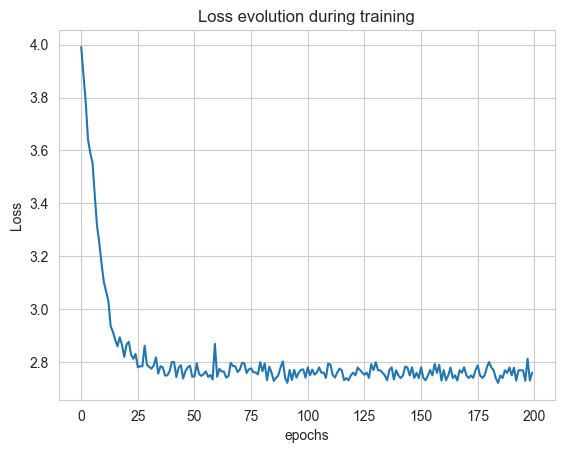

In [22]:
# we plot the mlp loss evolution during training
plt.plot(mlp.list_loss)
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.title("Loss evolution during training")
plt.show()

The results are promising, and we will now try to improve the models with hyperparameter tuning and test on both datasets.

## Feature selection

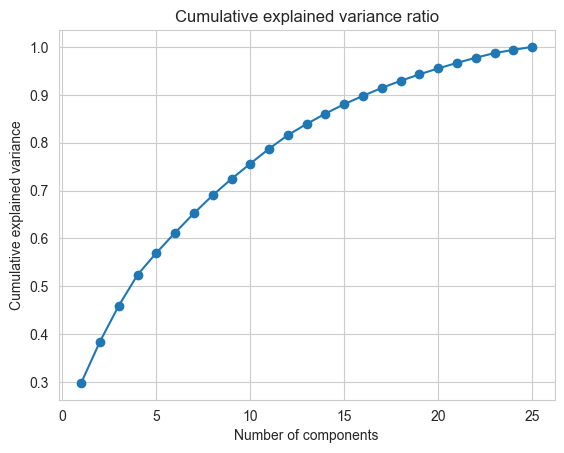

In [23]:
# We use PCA to reduce the dimensionality of the kidney data (the bank data is already low dimensional)

from sklearn.decomposition import PCA

full_pca = PCA(n_components=len(scaled_train_kidney.columns)-1)

full_pca.fit(X_train_kidney)

plt.plot(
    range(1, len(full_pca.explained_variance_ratio_) + 1),
    np.cumsum(full_pca.explained_variance_ratio_), marker="o")
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("Cumulative explained variance ratio")
plt.show()

In [24]:
# We keep 80% of the variance
print(n_components := np.argmax(np.cumsum(full_pca.explained_variance_ratio_) > 0.8))

pca = PCA(n_components=n_components)

X_train_kidney_pca = pca.fit_transform(X_train_kidney)
X_test_kidney_pca = pca.transform(X_test_kidney)


11


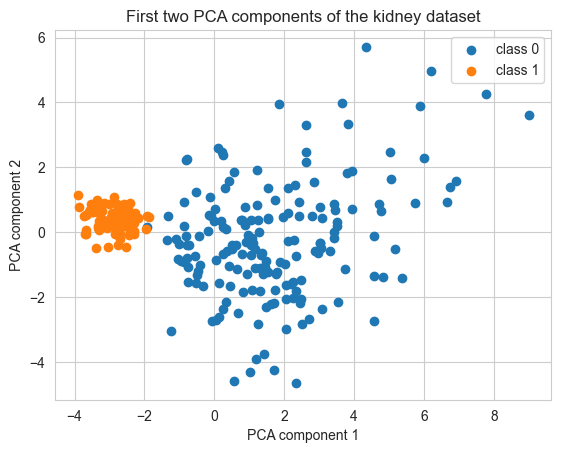

In [25]:
plt.scatter(X_train_kidney_pca[:,0][y_train_kidney==0], X_train_kidney_pca[:,1][y_train_kidney==0], label="class 0")
plt.scatter(X_train_kidney_pca[:,0][y_train_kidney==1], X_train_kidney_pca[:,1][y_train_kidney==1], label="class 1")
plt.xlabel("PCA component 1")
plt.ylabel("PCA component 2")
plt.title("First two PCA components of the kidney dataset")
plt.legend()
plt.show()


## Hyperparameter tuning

Let's first have a look at all the hyperparameters of the models.

### k-NN
- n_neighbors: number of neighbors to use [1, 3, 5, 10]
- weights: weight function used in prediction ['uniform', 'distance']

### SVM
- C: penalty parameter of the error term [0.1, 1, 10, 100]
- gamma: kernel coefficient for 'rbf' ['scale', 'auto']

### Decision Tree
- criterion: function to measure the quality of a split ['gini', 'entropy']
- max_depth: maximum depth of the tree [None, 5, 10, 20]

### Random Forest
- n_estimators: number of trees in the forest [10, 50, 200]
- criterion: function to measure the quality of a split ['gini', 'entropy']
- max_depth: maximum depth of the tree [None, 5, 10, 20]

### xGBoost
- n_estimators: number of trees in the forest [10, 50, 200]
- max_depth: maximum depth of the tree [None, 5, 10, 20]
- learning_rate: learning rate [0.1, 0.01]

### Gaussian Naive Bayes
- var_smoothing: portion of the largest variance of all features that is added to variances for calculation stability [1e-9, 1e-8, 1e-7]

### MLP (separated part)
- n_epochs: we put 500 and select the best model regarding the validation loss
- bs: batch size [32, 64, 128]
- opt: optimizer ['adam', 'sgd']
- lr: learning rate [1e-3, 1e-4, 1e-5]
- architecture: number of neurons in each layer [[16, 32, 16], [100, 100]]
- p: dropout probability [0.05, 0.1, 0.2] 


In [26]:
configs = {
    "KNeighborsClassifier" : {
        "n_neighbors" : [1,3,5, 10,],
        "weights" : ["uniform", "distance"],
    },
    "SVC" : {
        "C" : [0.1, 1, 10, 100],
        "gamma" : ["scale", "auto"],
    },
    "DecisionTreeClassifier" : {
        "criterion" : ["gini", "entropy"],
        "max_depth" : [None, 5, 10, 20],
    },
    "RandomForestClassifier" : {
        "n_estimators" : [10, 50, 200],
        "criterion" : ["gini", "entropy"],
        "max_depth" : [None, 5, 10, 20],
    },
    "GradientBoostingClassifier" : {
        "n_estimators" : [10, 50, 200],
        "learning_rate" : [0.1, 0.01],
        "max_depth" : [None, 5, 10, 20],
    },
    "GaussianNB" : {
        "var_smoothing" : [1e-9, 1e-8, 1e-7],
    },
    "TorchMLP" : {
        "opt" : ["adam", "sgd"],
        "lr": [0.01, 0.001],
        "architecture": [[16,4,16], [100, 100,]],
        "p": [0.05, 0.1, 0.2,],
        "verbose" : [False], # deactivate verbose to avoid printing the loss at each epoch
    }
}

from sklearn.model_selection import GridSearchCV
import time

inputs = {
    "bank": {
        "X_train" : X_train_bank,
        "y_train" : y_train_bank,
        "X_test" : X_test_bank,
        "y_test" : y_test_bank,
    },
    "kidney": {
        "X_train" : X_train_kidney,
        "y_train" : y_train_kidney,
        "X_test" : X_test_kidney,
        "y_test" : y_test_kidney,
    },
}


In [27]:
from model import train

In [28]:
dataset = "kidney"
train(dataset, model_list, configs, inputs)

KNeighborsClassifier


Best : {'n_neighbors': 1, 'weights': 'uniform'} with score 0.993 (in 1.136s)
Test score : 0.983

SVC
Best : {'C': 0.1, 'gamma': 'scale'} with score 1.000 (in 0.194s)
Test score : 1.000

DecisionTreeClassifier
Best : {'criterion': 'gini', 'max_depth': None} with score 0.993 (in 0.055s)
Test score : 1.000

GradientBoostingClassifier
Best : {'learning_rate': 0.1, 'max_depth': None, 'n_estimators': 10} with score 0.993 (in 1.135s)
Test score : 1.000

RandomForestClassifier
Best : {'criterion': 'gini', 'max_depth': None, 'n_estimators': 200} with score 1.000 (in 2.192s)
Test score : 1.000

GaussianNB
Best : {'var_smoothing': 1e-09} with score 0.971 (in 0.013s)
Test score : 0.950

TorchMLP
Best : {'architecture': [100, 100], 'lr': 0.01, 'opt': 'adam', 'p': 0.05, 'verbose': False} with score 1.000 (in 16.576s)
Test score : 1.000



In [29]:
dataset = "bank"
train(dataset, model_list, configs, inputs)

KNeighborsClassifier
Best : {'n_neighbors': 1, 'weights': 'uniform'} with score 0.999 (in 0.065s)
Test score : 0.995

SVC
Best : {'C': 1, 'gamma': 'scale'} with score 1.000 (in 0.058s)
Test score : 1.000

DecisionTreeClassifier
Best : {'criterion': 'entropy', 'max_depth': 10} with score 0.986 (in 0.042s)
Test score : 0.978

GradientBoostingClassifier
Best : {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50} with score 0.988 (in 3.727s)
Test score : 0.981

RandomForestClassifier
Best : {'criterion': 'gini', 'max_depth': 20, 'n_estimators': 10} with score 0.995 (in 2.879s)
Test score : 0.988

GaussianNB
Best : {'var_smoothing': 1e-09} with score 0.830 (in 0.015s)
Test score : 0.837

TorchMLP
Best : {'architecture': [16, 4, 16], 'lr': 0.001, 'opt': 'adam', 'p': 0.05, 'verbose': False} with score 1.000 (in 42.069s)
Test score : 1.000



---

For the choice of the models, only the MLP and the SVC have maximum accuracy on both dataset. Having the Occam's razor principle in mind, we can choose to favor the simplest (and fastest to train) model, i.e. the SVC.